# Technology shock

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Find steady state and Jacobian](#toc2_)    
- 3. [Find IRF](#toc3_)    
- 4. [Figures](#toc4_)    
  - 4.1. [Effect on the Production firms, Phillips-curve and Investments](#toc4_1_)    
    - 4.1.1. [Production firms](#toc4_1_1_)    
    - 4.1.2. [Phillips-curve](#toc4_1_2_)    
    - 4.1.3. [Investments](#toc4_1_3_)    
  - 4.2. [Effect on the Labor agency, Labor search & match, and Wages](#toc4_2_)    
  - 4.3. [Effect on Government](#toc4_3_)    
  - 4.4. [Effect on Consumption](#toc4_4_)    
    - 4.4.1. [Bequests and savings](#toc4_4_1_)    
  - 4.5. [Foreign economy](#toc4_5_)    
  - 4.6. [Other](#toc4_6_)    
    - 4.6.1. [Households - life-cycle](#toc4_6_1_)    
    - 4.6.2. [Long-term](#toc4_6_2_)    
    - 4.6.3. [National accouting - quantities](#toc4_6_3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt   
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from BabyMAKROModel import BabyMAKROModelClass

## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [2]:
model = BabyMAKROModelClass(name='baseline')            

**Unpack namespaces:**

In [3]:
par = model.par                 
ss = model.ss                   
sol = model.sol                

## 2. <a id='toc2_'></a>[Find steady state and Jacobian](#toc0_)

**Find SS:**

In [4]:
model.find_ss()      

**Jacobian:**

In [5]:
model.compile(do_print=True)

model compiled, 1.0 mins 12 secs


In [6]:
model.calc_jac(do_print=True)   

Jacobian calculated in 3.4 secs


## 3. <a id='toc3_'></a>[Find IRF](#toc0_)

**Set exogenous variables:**

In [7]:
model.set_exo_ss()             

**Define shock:**

In [8]:
Tshock = 50                                                             # length of shock
persistence = np.array([0.80**np.arange(Tshock)])                       # persistence of shock       
persistence = persistence.reshape((Tshock,1)) 
model.sol.Gamma[0:Tshock,:] = model.ss.Gamma*(1 + 0.01*persistence)     # technology shock

**Finds IRF:**

In [9]:
model.find_IRF()                

initial:
t1-t0 = 0.06906 secs
it = 6
    max. abs. error = 2.93e-12
    4.83e-14 in A_R_ini_error
    1.89e-15 in Aq_diff
    3.66e-15 in FOC_capital_agency
    4.77e-13 in FOC_K_ell
    2.93e-12 in mkt_clearing
    3.97e-14 in PC

solve: t1-t0 = 0.07406 secs
evaluate + update: t3-t2 = 0.14312 secs


## 4. <a id='toc4_'></a>[Figures](#toc0_)

### 4.1. <a id='toc4_1_'></a>[Effect on the Production firms, Phillips-curve and Investments](#toc0_)

#### 4.1.1. <a id='toc4_1_1_'></a>[Production firms](#toc0_)

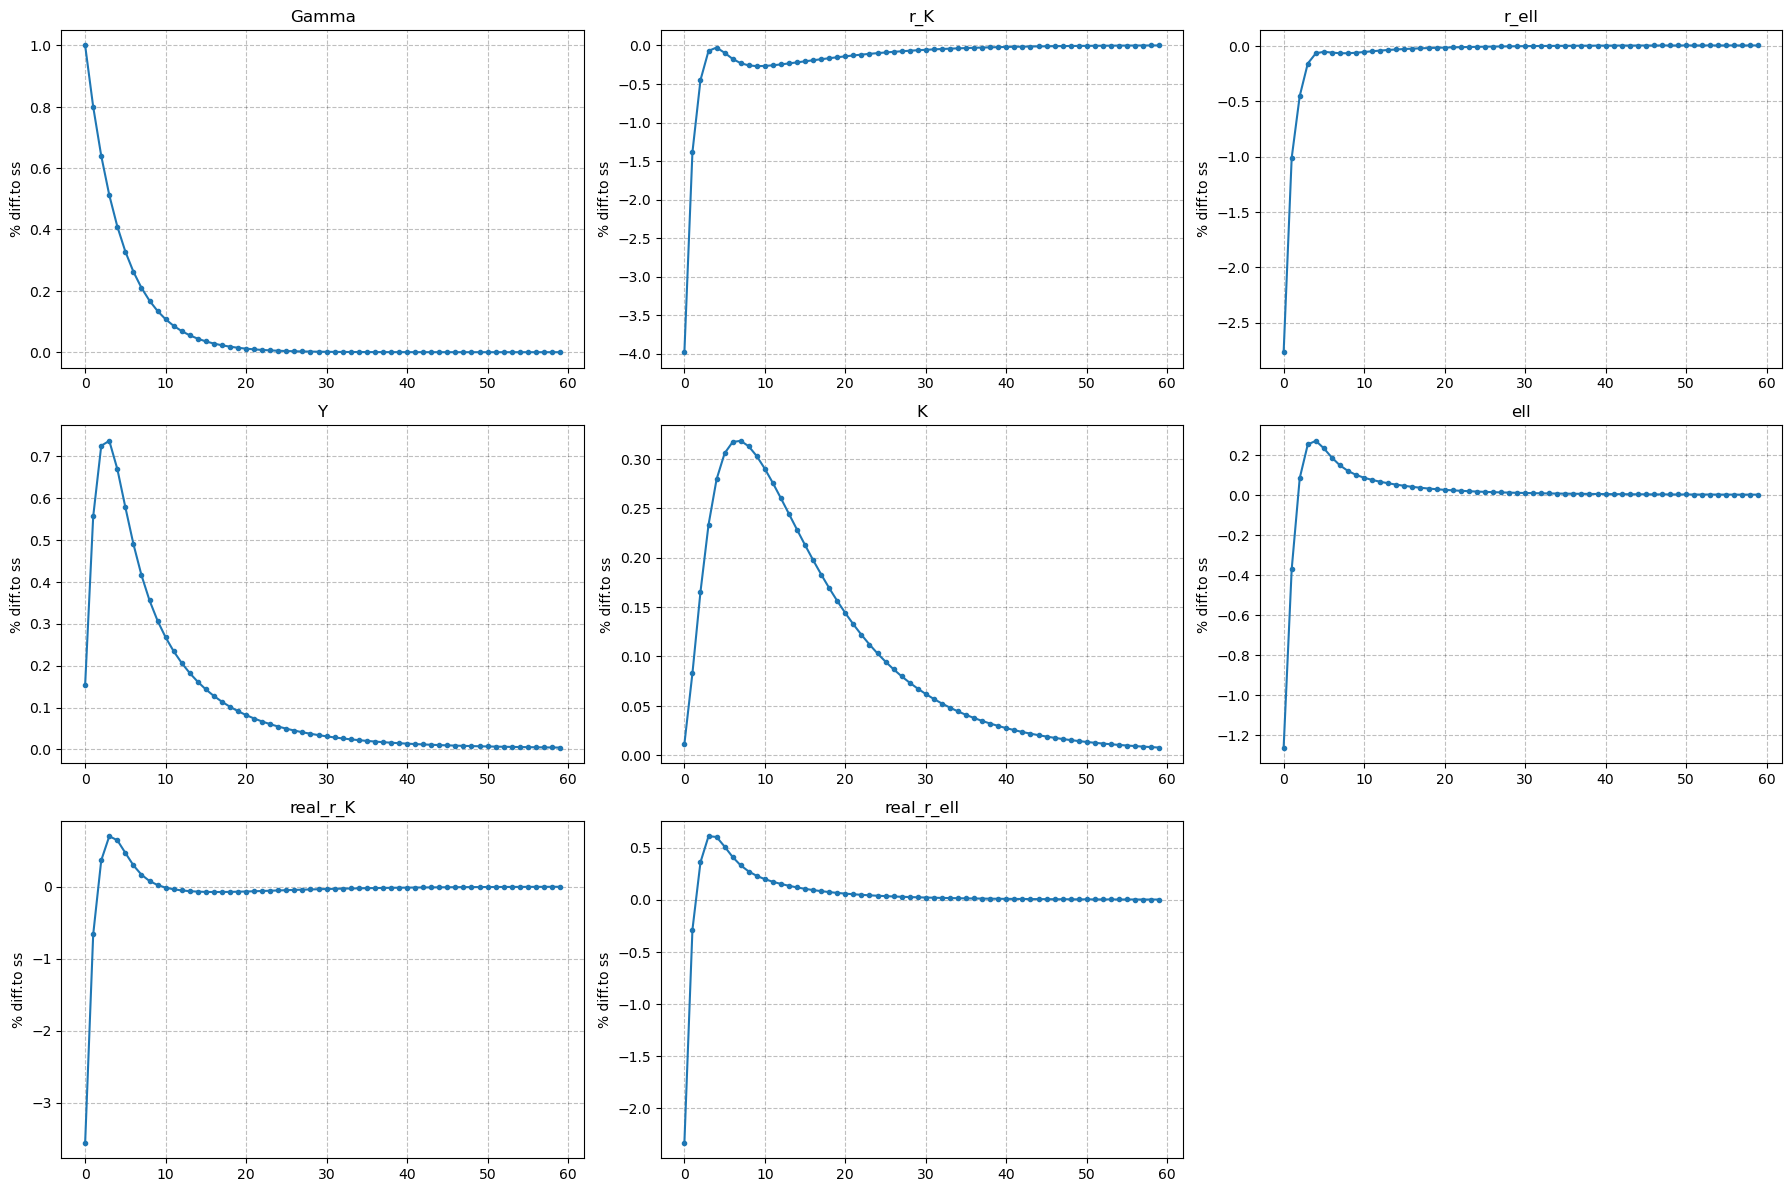

In [10]:
model.plot_IRF(varlist=['Gamma','r_K','r_ell','Y','K','ell','real_r_K','real_r_ell'])

#### 4.1.2. <a id='toc4_1_2_'></a>[Phillips-curve](#toc0_)

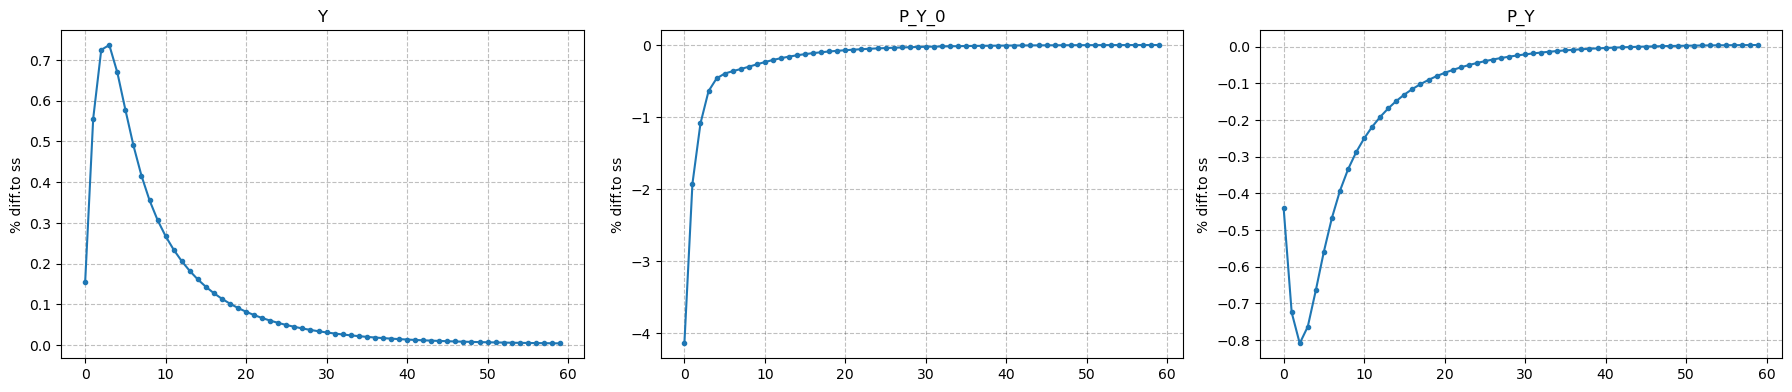

In [11]:
model.plot_IRF(varlist=['Y','P_Y_0','P_Y'])

#### 4.1.3. <a id='toc4_1_3_'></a>[Investments](#toc0_)

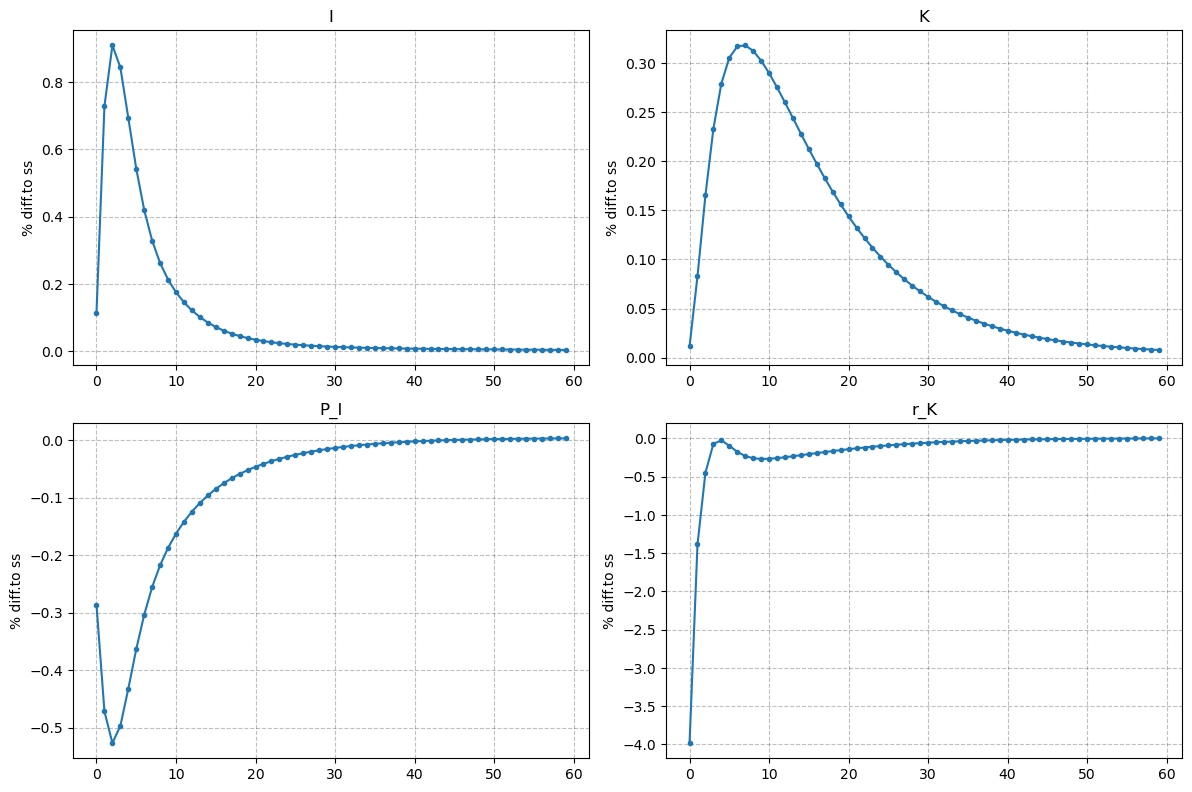

In [12]:
model.plot_IRF(varlist=['I','K','P_I','r_K'],ncol=2)

### 4.2. <a id='toc4_2_'></a>[Effect on the Labor agency, Labor search & match, and Wages](#toc0_)

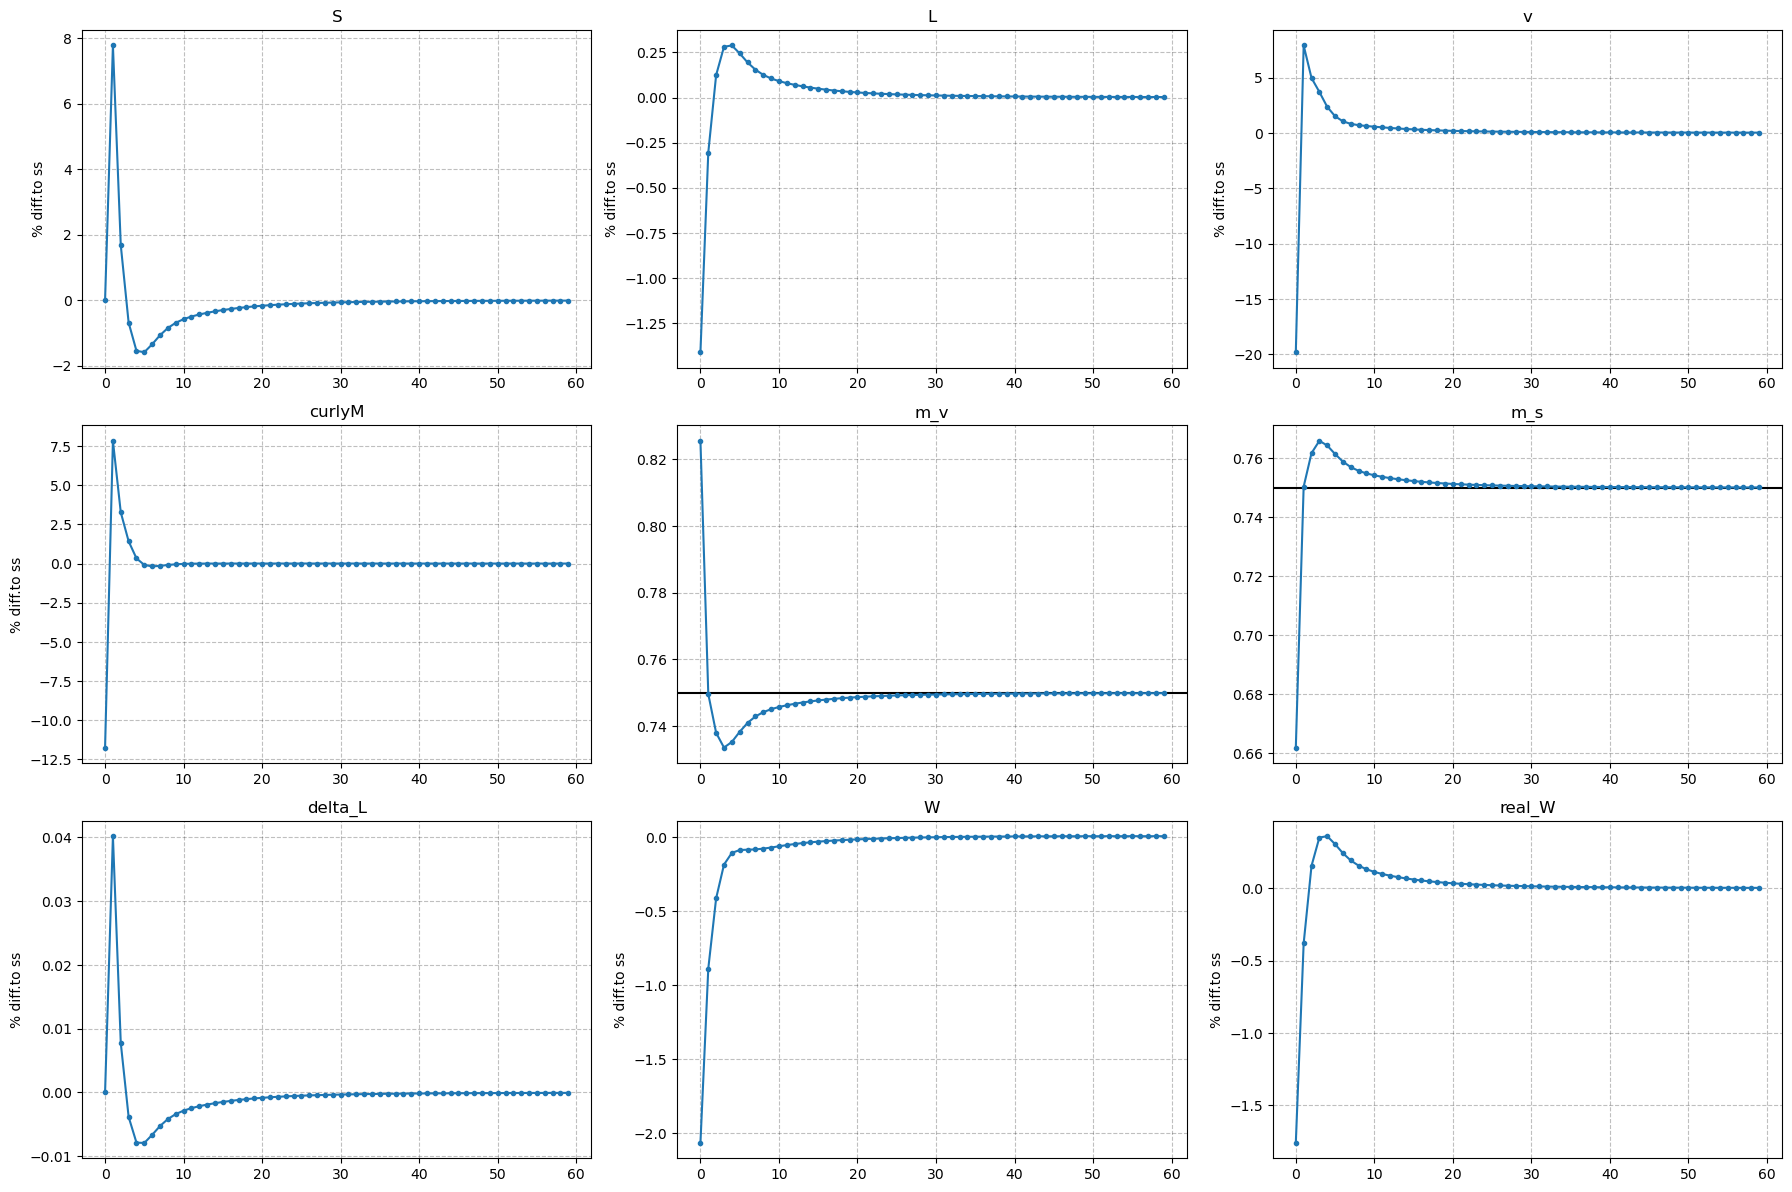

In [13]:
model.plot_IRF(varlist=['S','L','v','curlyM','m_v','m_s','delta_L','W','real_W'],abs=['m_v','m_s'])

### 4.3. <a id='toc4_3_'></a>[Effect on Government](#toc0_)

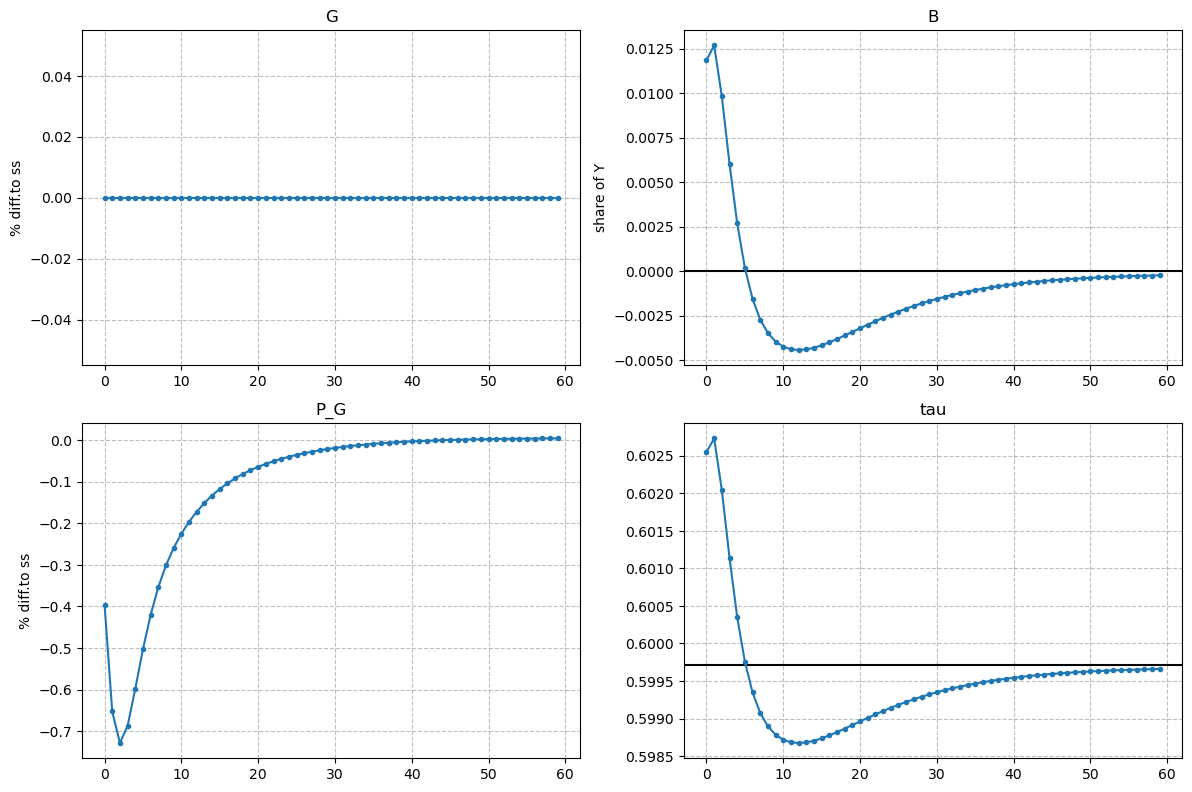

In [14]:
model.plot_IRF(varlist=['G','B','P_G','tau'], ncol=2,abs=['tau'],Y_share=['B'])

### 4.4. <a id='toc4_4_'></a>[Effect on Consumption](#toc0_)

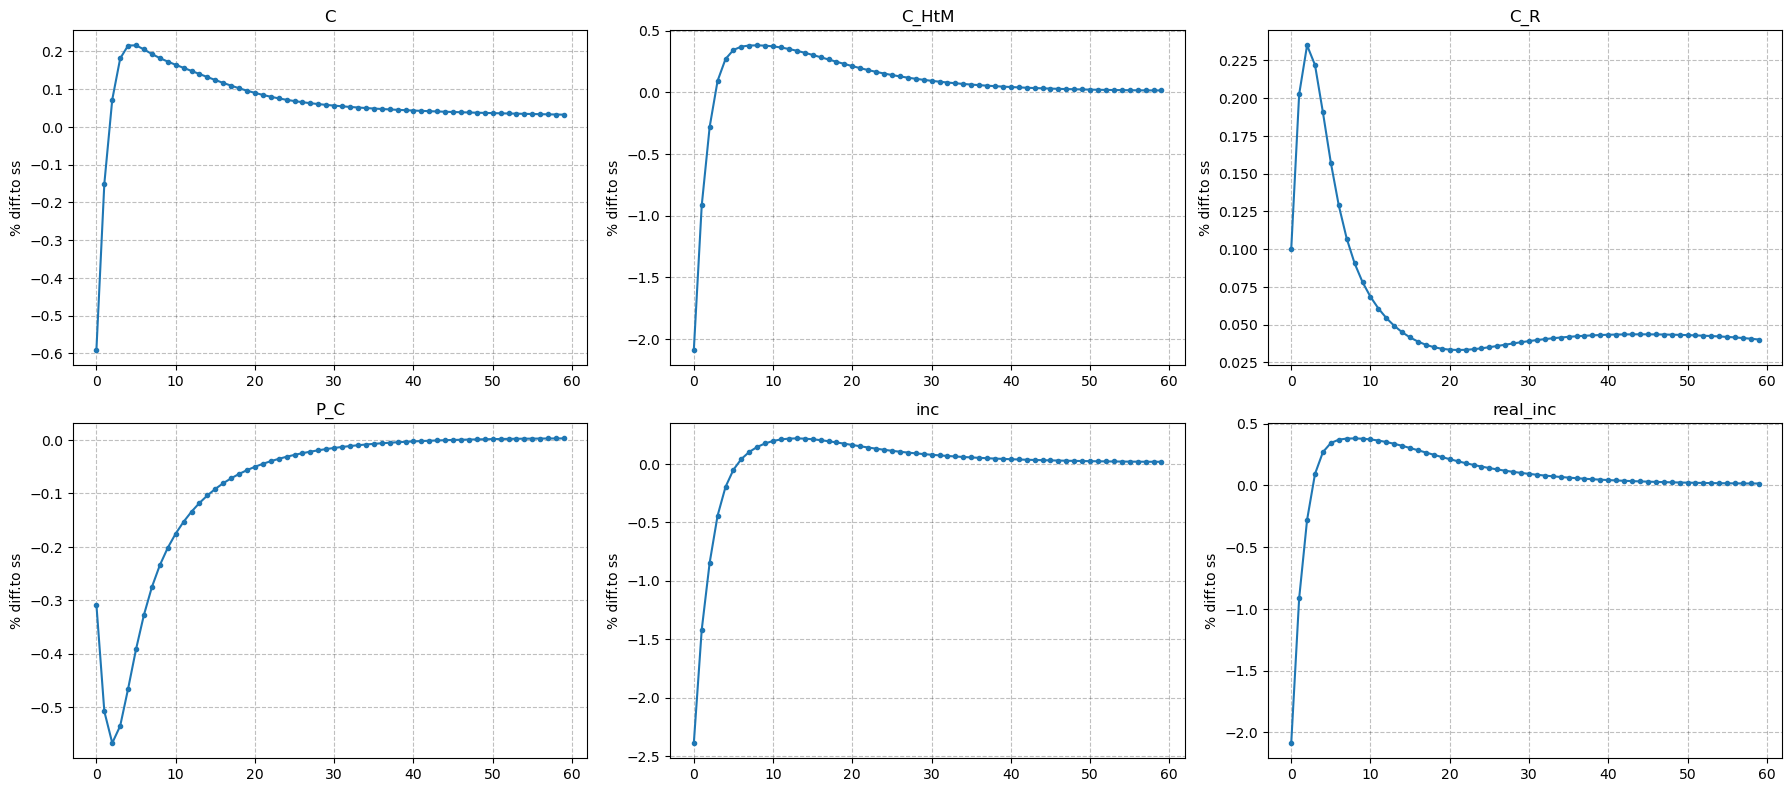

In [15]:
model.plot_IRF(varlist=['C','C_HtM','C_R','P_C','inc','real_inc'])

#### 4.4.1. <a id='toc4_4_1_'></a>[Bequests and savings](#toc0_)

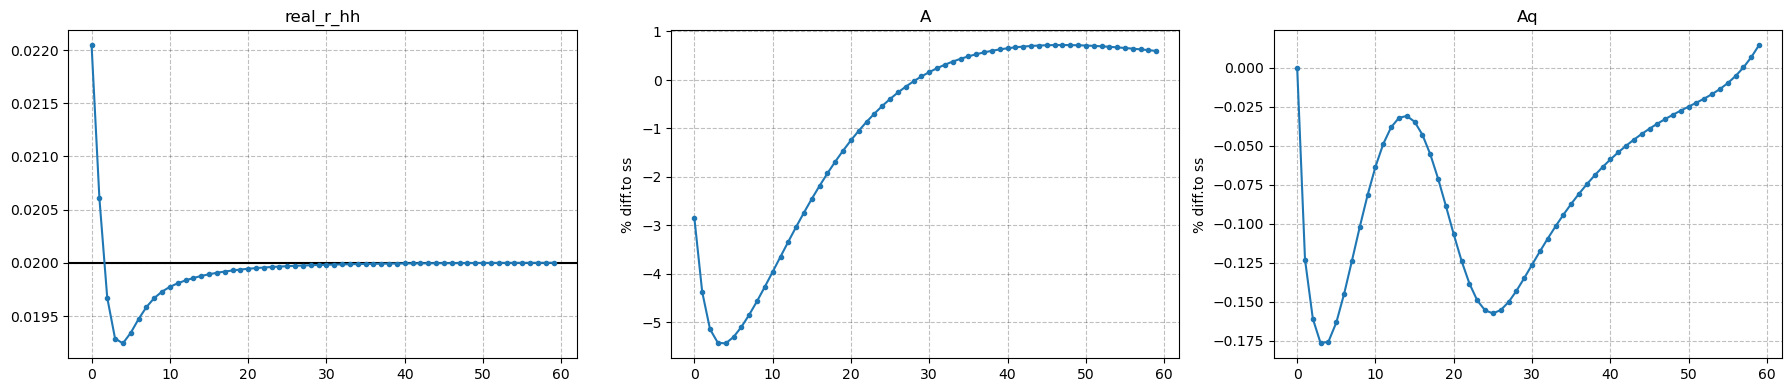

In [16]:
model.plot_IRF(varlist=['real_r_hh','A','Aq'],abs=['real_r_hh'])

### 4.5. <a id='toc4_5_'></a>[Foreign economy](#toc0_)

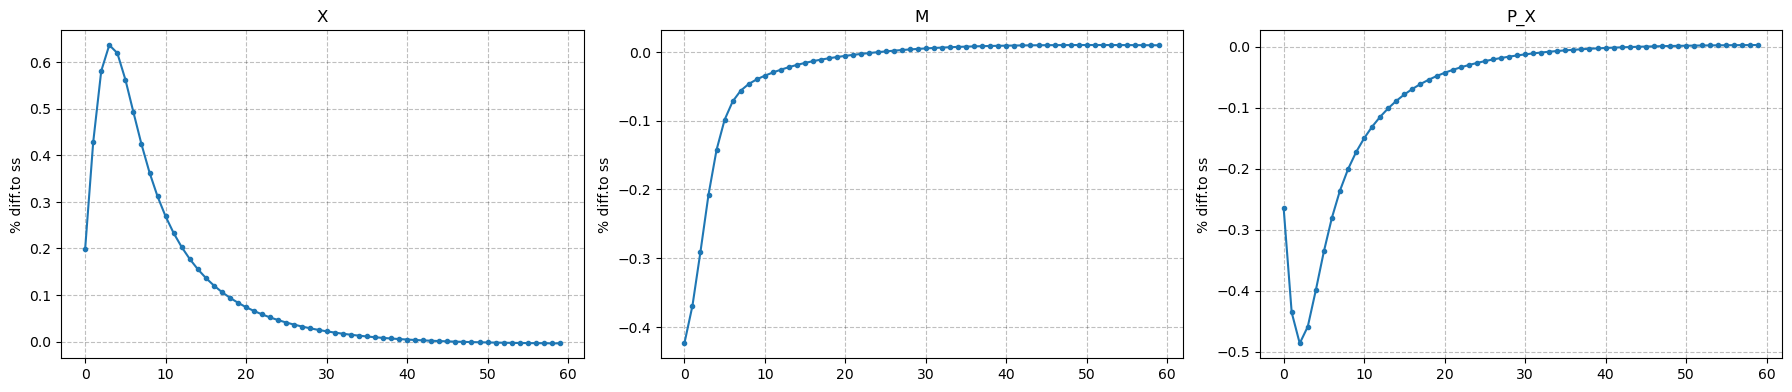

In [17]:
model.plot_IRF(varlist=['X','M','P_X'])

### 4.6. <a id='toc4_6_'></a>[Other](#toc0_)

#### 4.6.1. <a id='toc4_6_1_'></a>[Households - life-cycle](#toc0_)

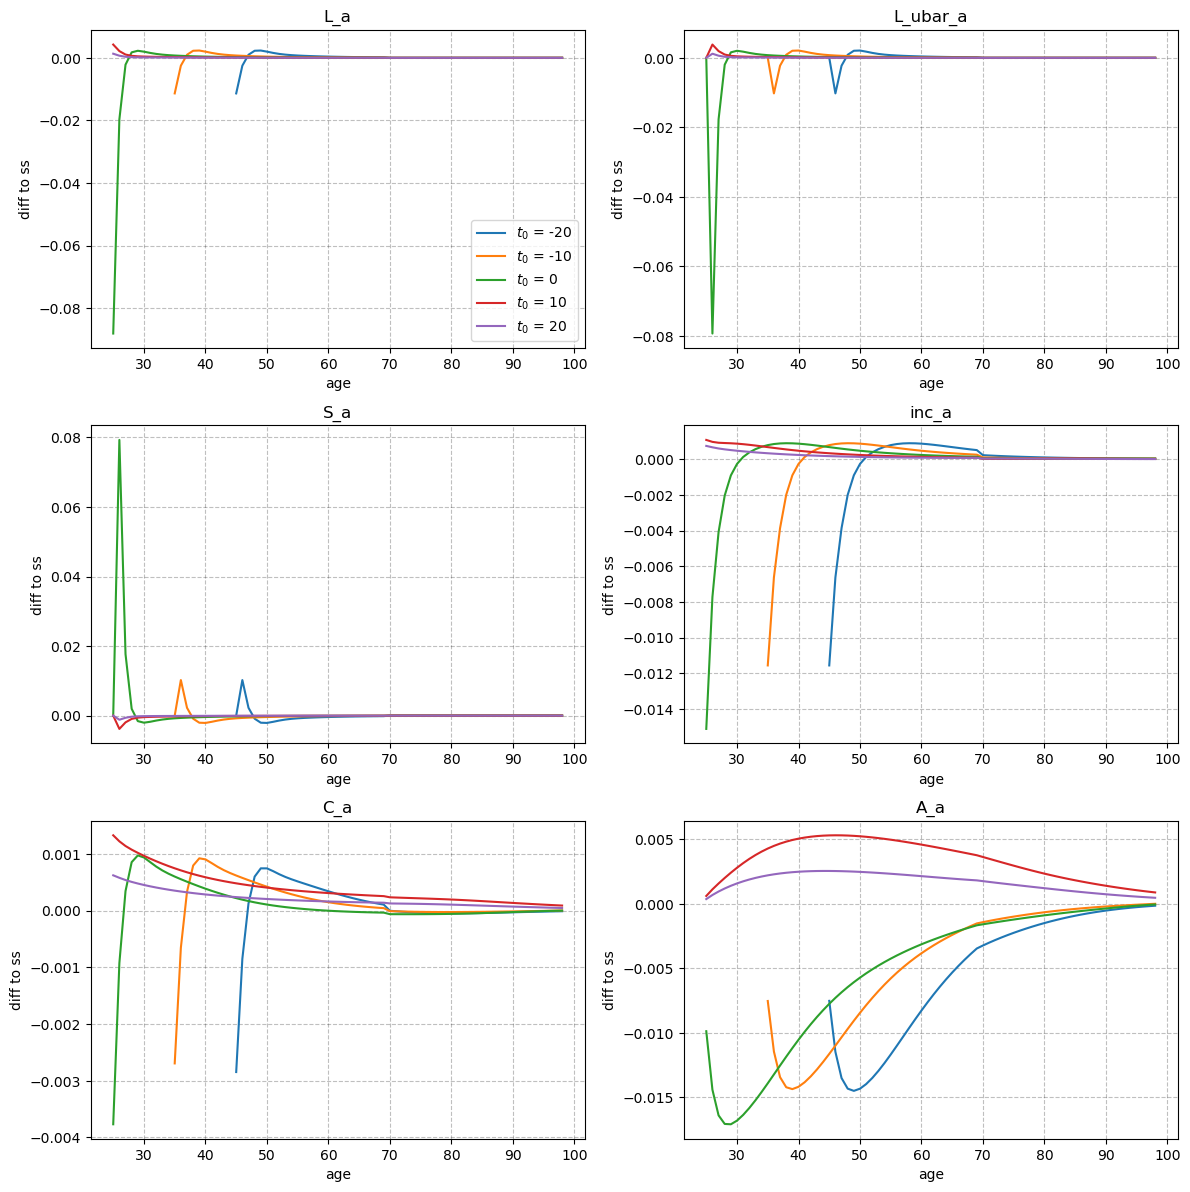

In [18]:
model.plot_IRF_hh(varlist=['L_a','L_ubar_a','S_a','inc_a','C_a','A_a'],t0_list=[-20,-10,0,10,20])

#### 4.6.2. <a id='toc4_6_2_'></a>[Long-term](#toc0_)

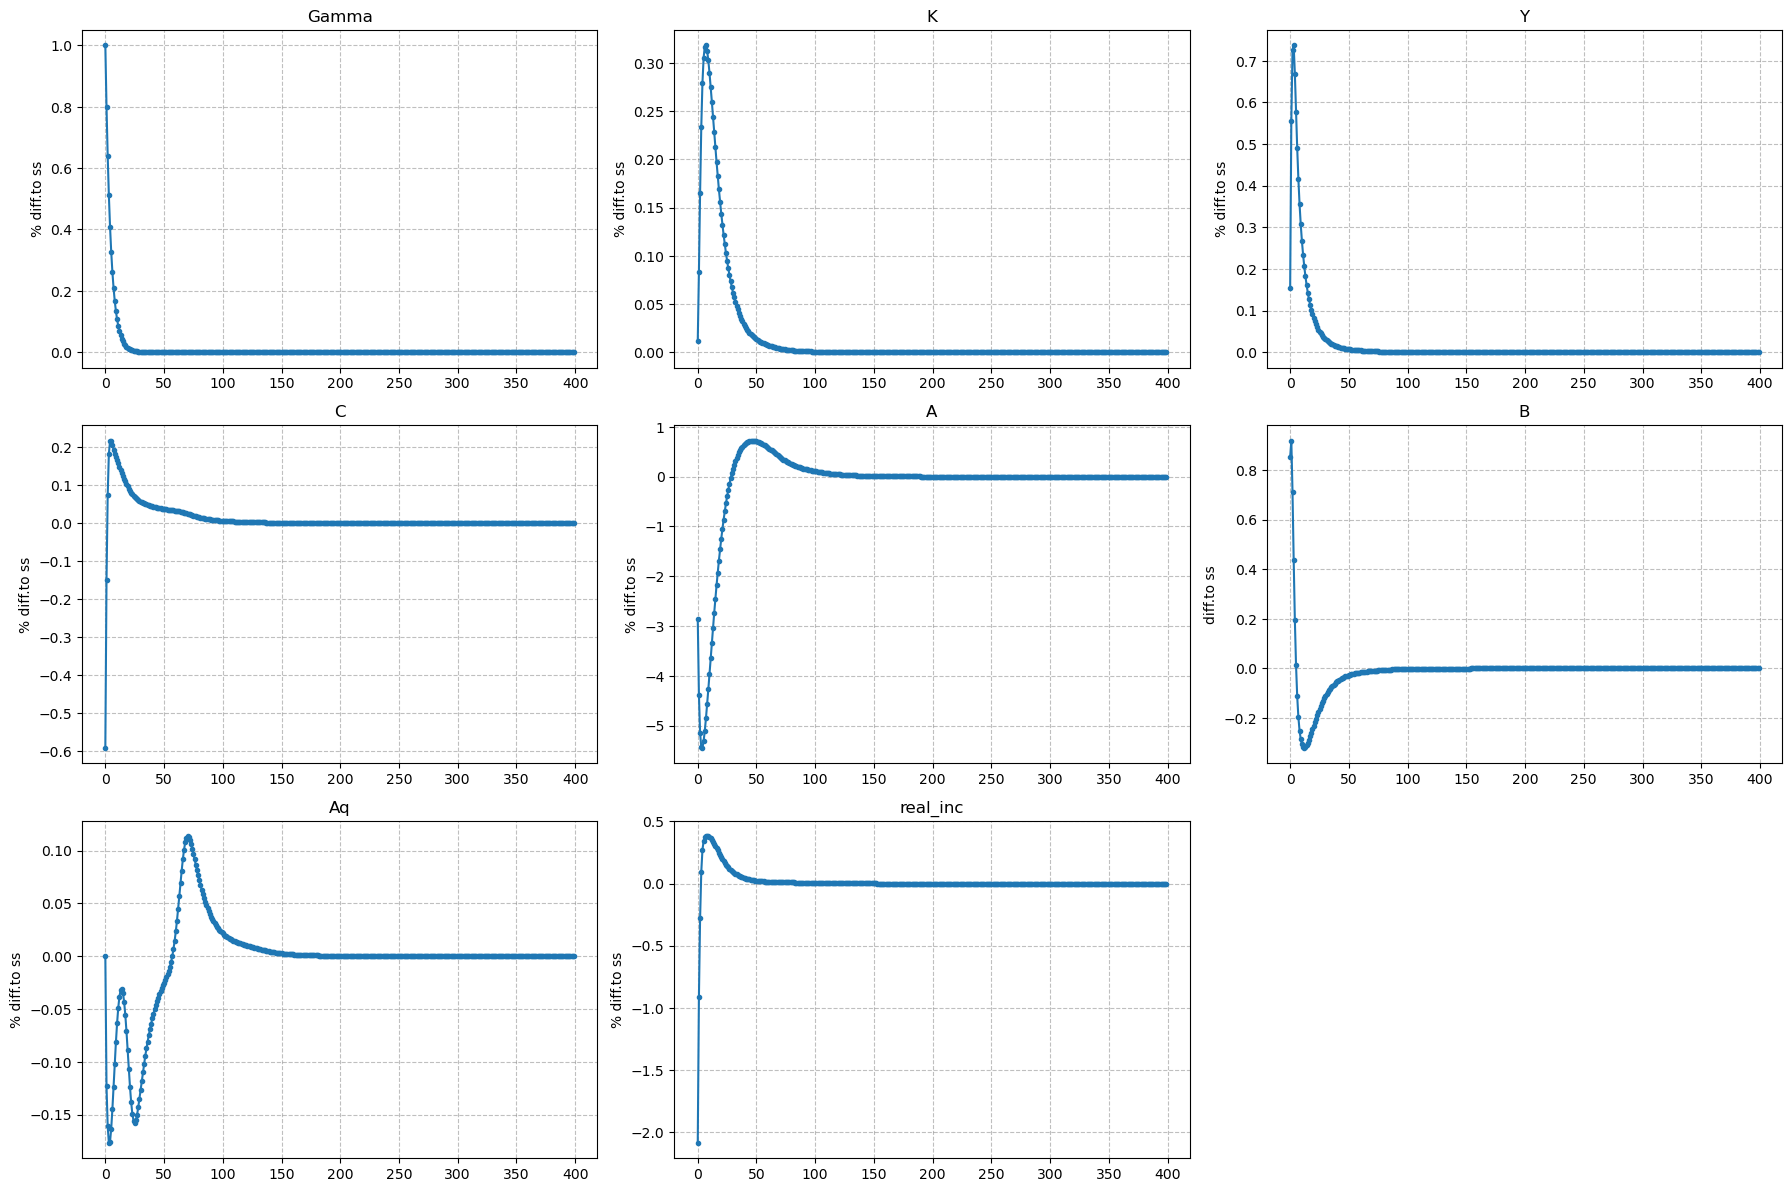

In [19]:
model.plot_IRF(varlist=['Gamma','K','Y','C','A','B','Aq','real_inc'],T_IRF=par.T)

#### 4.6.3. <a id='toc4_6_3_'></a>[National accouting - quantities](#toc0_)

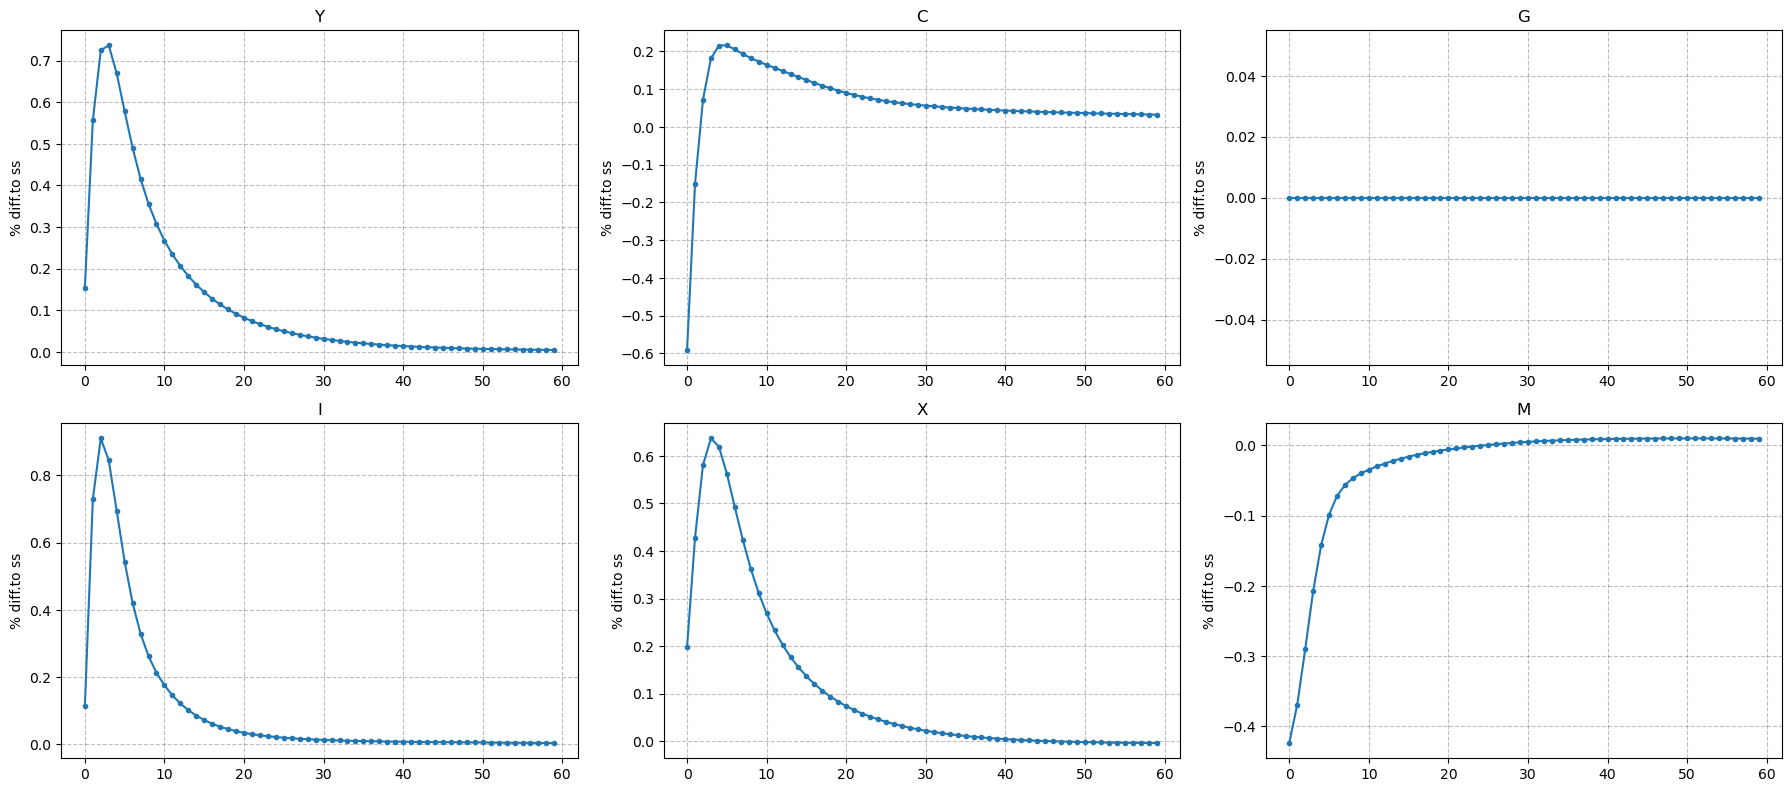

In [20]:
model.plot_IRF(varlist=['Y','C','G','I','X','M'])